In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Đọc dữ liệu log từ CSV
log_data = pd.read_csv('vncodelab_logs_update_21_2.csv')

# Xử lý dữ liệu: Mã hóa hành động và trạng thái thành vector
def encode_action_type(action_data):
    encoder = LabelEncoder()
    return encoder.fit_transform(action_data)

# Mã hóa hành động
log_data['action_encoded'] = encode_action_type(log_data['actionType'])

# Nhúng văn bản từ log.message và log.answer sử dụng TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_features = tfidf.fit_transform(log_data['log.message'].fillna(''))

# Hoặc sử dụng Word2Vec cho việc nhúng văn bản
# Sử dụng Word2Vec trên câu hỏi hoặc câu trả lời của sinh viên
word2vec_model = Word2Vec(sentences=[str(i).split() for i in log_data['log.message'].fillna('')],
                           vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec_vector(text, model):
    words = str(text).split()
    vector = np.zeros(100)
    count = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    return vector if count == 0 else vector / count

log_data['word2vec_features'] = log_data['log.message'].apply(lambda x: get_word2vec_vector(x, word2vec_model))

# Tạo đặc trưng thời gian từ timestamp
log_data['timestamp'] = pd.to_datetime(log_data['timestamp'])
log_data['hour'] = log_data['timestamp'].dt.hour
log_data['day'] = log_data['timestamp'].dt.dayofweek

# Tạo biến mục tiêu cho dự đoán điểm chuyên cần
# Giả sử có một cột 'attendance_score' trong dữ liệu hoặc tính toán từ các hành động
log_data['attendance_score'] = np.random.randint(0, 100, size=len(log_data))  # Giả lập điểm chuyên cần

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = pd.concat([log_data[['action_encoded', 'hour', 'day']], pd.DataFrame(tfidf_features.toarray()), pd.DataFrame(log_data['word2vec_features'].to_list())], axis=1)
y = log_data['attendance_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình học máy (DNN - Deep Neural Network) để dự đoán điểm chuyên cần
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, Mean Absolute Error: {mae}')


C:\Users\SON\AppData\Local\Temp\ipykernel_28424\3439700189.py:11: DtypeWarning: Columns (1,3,4,7,10,14,15,16,17,18,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  log_data = pd.read_csv('vncodelab_logs_update_21_2.csv')
c:\Users\SON\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1122.7474 - mae: 27.9580 - val_loss: 836.8602 - val_mae: 24.8956
Epoch 2/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 856.2892 - mae: 25.3279 - val_loss: 819.9282 - val_mae: 24.7158
Epoch 3/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 851.6552 - mae: 25.2713 - val_loss: 821.9767 - val_mae: 24.7396
Epoch 4/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 844.8625 - mae: 25.1373 - val_loss: 820.7308 - val_mae: 24.7245
Epoch 5/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 847.9911 - mae: 25.2217 - val_loss: 823.6322 - val_mae: 24.7614
Epoch 6/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 843.7366 - mae: 25.1383 - val_loss: 820.2546 - val_mae: 24.7195
Epoch 7/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 846.9890 - mae: 25.2324 - val_loss: 820.3311 - val_mae: 24.7237
Epoch 8/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 845.9301 - mae: 25.1847 - val_loss: 826.5030 - val_mae:

In [7]:
import pandas as pd

# Đọc dữ liệu từ file CSV và ép kiểu dữ liệu rõ ràng, đồng thời tắt cảnh báo dtype
log_data = pd.read_csv('vncodelab_logs_update_21_2.csv', dtype=str, low_memory=False)

# Kiểm tra số lượng NaN trong logType
print("Số lượng NaN trong logType:", log_data['logType'].isna().sum())

# Thay thế NaN bằng "Unknown" và gán lại vào chính DataFrame để tránh cảnh báo
log_data.loc[:, 'logType'] = log_data['logType'].fillna("Unknown")

# Kiểm tra lại sau khi thay thế
print("Sau khi thay thế, số lượng NaN trong logType:", log_data['logType'].isna().sum())


Số lượng NaN trong logType: 190
Sau khi thay thế, số lượng NaN trong logType: 0


In [8]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Đọc dữ liệu từ file CSV với xử lý lỗi dtype và NaN
log_data = pd.read_csv('vncodelab_logs_update_21_2.csv', dtype=str, low_memory=False)

# Kiểm tra số lượng NaN trong logType
print("Số lượng NaN trong logType:", log_data['logType'].isna().sum())

# Thay thế NaN trong logType bằng "Unknown"
log_data.loc[:, 'logType'] = log_data['logType'].fillna("Unknown")

# Kiểm tra lại số lượng NaN sau khi thay thế
print("Sau khi thay thế, số lượng NaN trong logType:", log_data['logType'].isna().sum())

# Khởi tạo OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Mã hóa logType thành One-Hot Encoding
log_data_encoded = encoder.fit_transform(log_data[['logType']])

# Chuyển kết quả thành DataFrame
encoded_df = pd.DataFrame(log_data_encoded, columns=encoder.categories_[0])

# Hiển thị dữ liệu đã mã hóa
print("Dữ liệu sau khi mã hóa (One-Hot Encoding):")
print(encoded_df.head())

# Giả lập dữ liệu điểm chuyên cần (attendance_score) nếu không có sẵn
if 'attendance_score' not in log_data.columns:
    np.random.seed(42)  # Đảm bảo kết quả nhất quán
    log_data['attendance_score'] = np.random.randint(50, 100, size=len(log_data))

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = encoded_df  # Dữ liệu đã được mã hóa
y = log_data['attendance_score']  # Điểm chuyên cần

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình học sâu (Deep Neural Network)
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Mô hình dự đoán điểm chuyên cần (giá trị liên tục)
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, Mean Absolute Error: {mae}')


Số lượng NaN trong logType: 190
Sau khi thay thế, số lượng NaN trong logType: 0
Dữ liệu sau khi mã hóa (One-Hot Encoding):
   Quiz  Unknown  chat  clearRoom  clickLink  codeSubmit  copyCode  leaveRoom  \
0   0.0      1.0   0.0        0.0        0.0         0.0       0.0        0.0   
1   0.0      1.0   0.0        0.0        0.0         0.0       0.0        0.0   
2   0.0      1.0   0.0        0.0        0.0         0.0       0.0        0.0   
3   0.0      1.0   0.0        0.0        0.0         0.0       0.0        0.0   
4   0.0      1.0   0.0        0.0        0.0         0.0       0.0        0.0   

   raiseHand  scrollPosition  step  
0        0.0             0.0   0.0  
1        0.0             0.0   0.0  
2        0.0             0.0   0.0  
3        0.0             0.0   0.0  
4        0.0             0.0   0.0  
Epoch 1/10


c:\Users\SON\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1762/1762 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1306.7498 - mae: 25.8994 - val_loss: 209.1483 - val_mae: 12.4798
Epoch 2/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 221.7542 - mae: 12.7388 - val_loss: 207.6652 - val_mae: 12.4370
Epoch 3/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 221.3662 - mae: 12.7566 - val_loss: 208.7913 - val_mae: 12.4589
Epoch 4/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 221.0347 - mae: 12.7394 - val_loss: 210.5529 - val_mae: 12.5106
Epoch 5/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 218.8916 - mae: 12.6871 - val_loss: 208.8845 - val_mae: 12.4705
Epoch 6/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 220.2775 - mae: 12.7248 - val_loss: 207.8654 - val_mae: 12.4467
Epoch 7/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 219.3234 - mae: 12.7129 - val_loss: 210.7348 - val_mae: 12.5156
Epoch 8/10
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 220.7991 - mae: 12.7596 - val_loss: 207.9212 - val_mae: 12.4453
Ep

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Đọc dữ liệu từ file CSV với xử lý dtype và NaN
log_data = pd.read_csv('vncodelab_logs_update_21_2.csv', dtype=str, low_memory=False)

# Xử lý NaN trong cột logType
log_data['logType'].fillna("Unknown", inplace=True)

# Xử lý NaN trong các cột khác (nếu có)
log_data.fillna(0, inplace=True)

# Khởi tạo OneHotEncoder và mã hóa logType
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
log_data_encoded = encoder.fit_transform(log_data[['logType']])

# Chuyển One-Hot Encoding thành DataFrame
encoded_df = pd.DataFrame(log_data_encoded, columns=encoder.categories_[0])

# Thêm các đặc trưng khác
log_data['timestamp'] = pd.to_datetime(log_data['timestamp'], errors='coerce')
log_data['hour'] = log_data['timestamp'].dt.hour.fillna(0)  # Lấy giờ từ timestamp
log_data['day'] = log_data['timestamp'].dt.dayofweek.fillna(0)  # Lấy thứ trong tuần

# Đếm số lần giơ tay
log_data['raiseHand'] = log_data['logType'].apply(lambda x: 1 if 'raiseHand' in x else 0)

# Đếm số lần chat
log_data['chat'] = log_data['logType'].apply(lambda x: 1 if 'chat' in x else 0)

# Đếm số lần làm quiz
log_data['quiz'] = log_data['logType'].apply(lambda x: 1 if 'quiz' in x else 0)

# Chuẩn hóa các đặc trưng số
scaler = StandardScaler()
numerical_features = ['hour', 'day', 'raiseHand', 'chat', 'quiz']
scaled_numerical = scaler.fit_transform(log_data[numerical_features])

# Chuyển đổi dữ liệu thành DataFrame
scaled_df = pd.DataFrame(scaled_numerical, columns=numerical_features)

# Kết hợp tất cả dữ liệu
final_X = pd.concat([encoded_df, scaled_df], axis=1)

# Tạo cột điểm chuyên cần (giả lập nếu không có)
if 'attendance_score' not in log_data.columns:
    np.random.seed(42)
    log_data['attendance_score'] = np.random.randint(50, 100, size=len(log_data))

y = log_data['attendance_score']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình DNN cải tiến
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Dự đoán điểm chuyên cần
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình (tăng số epoch lên 30)
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}, Mean Absolute Error: {mae}')


C:\Users\SON\AppData\Local\Temp\ipykernel_25240\1762088236.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  log_data['logType'].fillna("Unknown", inplace=True)
c:\Users\SON\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 780.5065 - mae: 19.8006 - val_loss: 208.6054 - val_mae: 12.4593
Epoch 2/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 239.6606 - mae: 13.1104 - val_loss: 209.8083 - val_mae: 12.4728
Epoch 3/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 237.1007 - mae: 13.0736 - val_loss: 209.6147 - val_mae: 12.4747
Epoch 4/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 233.4029 - mae: 12.9608 - val_loss: 213.7490 - val_mae: 12.5808
Epoch 5/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 232.9832 - mae: 12.9641 - val_loss: 227.4327 - val_mae: 12.8281
Epoch 6/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 234.6805 - mae: 13.0237 - val_loss: 210.1441 - val_mae: 12.4839
Epoch 7/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 229.0426 - mae: 12.8956 - val_loss: 208.2200 - val_mae: 12.4487
Epoch 8/30
1762/1762 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 227.8504 - mae: 12.8609 - val_loss: 211.4920 - val_

Dữ liệu log ban đầu (5 dòng đầu tiên):
                        _id  userId          userName  roomId  actionType  \
0  67b53b2231f50b2d9dae3540     NaN    Nguyen Yen Nhi     NaN         NaN   
1  67b548c831f50b2d9dae3612     NaN  Nguyen Duc Thuan     NaN         NaN   
2  67b548c931f50b2d9dae3614     NaN  Nguyen Duc Thuan     NaN         NaN   
3  67b548ca31f50b2d9dae3615     NaN  Nguyen Duc Thuan     NaN         NaN   
4  67b548cb31f50b2d9dae3616     NaN  Nguyen Duc Thuan     NaN         NaN   

   stepId                        timestamp  handStatus    logType  roomID  \
0     NaN 2025-02-19 02:00:02.082000+00:00         NaN  leaveRoom  2wpTye   
1     NaN 2025-02-19 02:58:16.442000+00:00         NaN       step  2wpTye   
2     NaN 2025-02-19 02:58:17.840000+00:00         NaN       step  2wpTye   
3     NaN 2025-02-19 02:58:18.821000+00:00         NaN       step  2wpTye   
4     NaN 2025-02-19 02:58:19.836000+00:00         NaN       step  2wpTye   

   ...  userEmail  log.message  cha

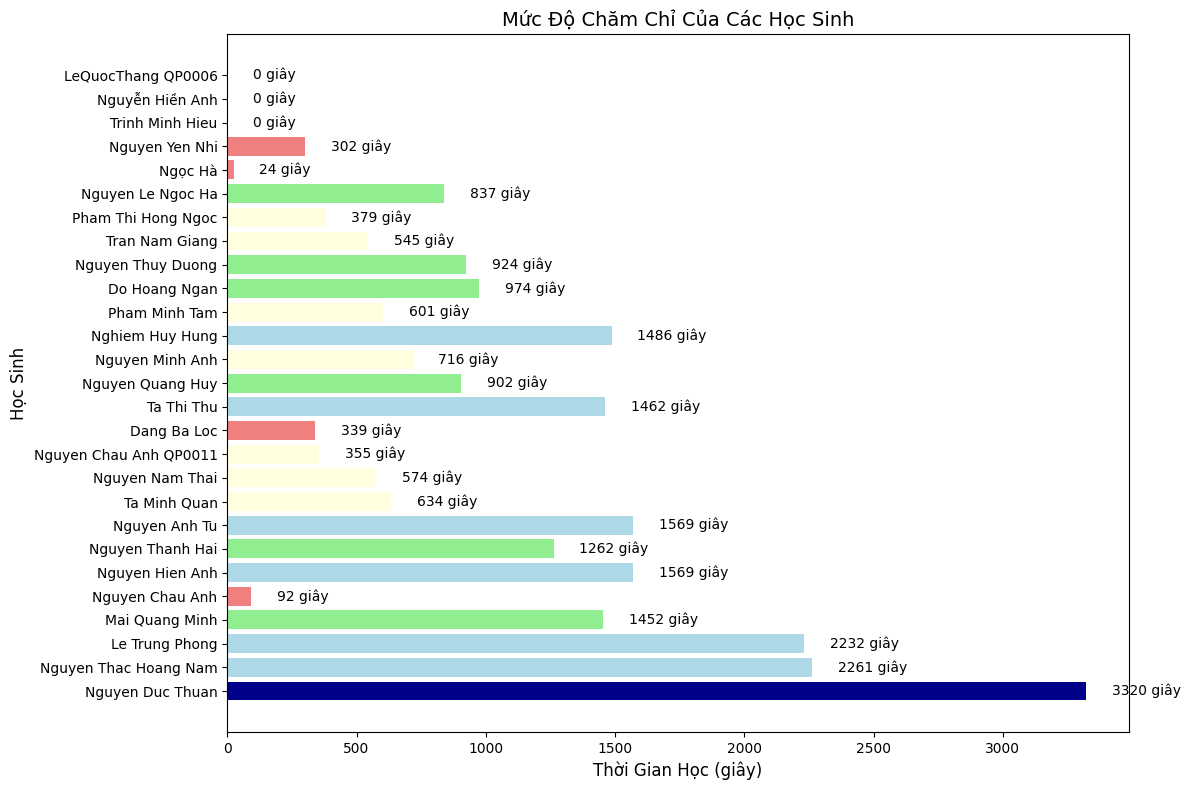


### Kết quả đánh giá các mô hình học máy ###

Mô hình: Linear Regression
MAE: 0.00
MSE: 0.00
R²: 1.00

Mô hình: Decision Tree
MAE: 51.67
MSE: 7497.87
R²: 0.61

Mô hình: Random Forest
MAE: 42.71
MSE: 7016.83
R²: 0.63

Mô hình: Gradient Boosting
MAE: 37.63
MSE: 6205.93
R²: 0.68


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hàm xử lý dữ liệu log và tính toán các đặc trưng
def process_log_data(file_path):
    # Đọc dữ liệu từ file Excel
    if file_path.endswith('.xlsx'):
        df_logs = pd.read_excel(file_path, engine='openpyxl')
    else:
        df_logs = pd.read_csv(file_path)

    # Chuyển đổi cột timestamp sang định dạng datetime
    df_logs['timestamp'] = pd.to_datetime(df_logs['timestamp'], errors='coerce')

    # Kiểm tra dữ liệu log
    print("Dữ liệu log ban đầu (5 dòng đầu tiên):")
    print(df_logs.head())
    print("\nCác giá trị trong cột logType:")
    print(df_logs['logType'].value_counts())
    print("\nCác giá trị trong cột actionType:")
    print(df_logs['actionType'].value_counts())

    # Tính Total Activity và LeaveRoom Count dựa trên cột logType
    total_activity = df_logs.groupby('userName')['logType'].count()
    leave_room_count = df_logs[df_logs['logType'] == 'leaveRoom'].groupby('userName')['logType'].count()
    leave_room_count = leave_room_count.reindex(total_activity.index, fill_value=0)
    real_activity = total_activity - leave_room_count

    # Tính Total Time Spent, loại bỏ khoảng thời gian vượt quá 10 phút
    df_logs_filtered = df_logs[~df_logs['logType'].isin(['leaveRoom', 'scrollPosition'])]
    df_logs_filtered = df_logs_filtered.sort_values(by=['userName', 'timestamp'])
    df_logs_filtered['time_diff'] = df_logs_filtered.groupby('userName')['timestamp'].diff().dt.total_seconds()

    # Loại bỏ các khoảng thời gian vượt quá 10 phút (600 giây)
    df_logs_filtered['time_diff'] = df_logs_filtered['time_diff'].apply(
        lambda x: x if (pd.notna(x) and x <= 600) else 0  # Nếu time_diff > 600 giây hoặc NaN, đặt về 0
    )

    # Tính tổng Total Time Spent sau khi loại bỏ
    total_time_spent = df_logs_filtered.groupby('userName')['time_diff'].sum()
    total_time_spent = total_time_spent.reindex(total_activity.index, fill_value=0)

    # Phân loại Time Spent Category dựa trên IQR
    total_time_spent_cleaned = pd.to_numeric(total_time_spent, errors='coerce').dropna()
    if len(total_time_spent_cleaned) > 0:
        Q1_cleaned = total_time_spent_cleaned.quantile(0.25)
        Q2_cleaned = total_time_spent_cleaned.quantile(0.50)
        Q3_cleaned = total_time_spent_cleaned.quantile(0.75)
        IQR = Q3_cleaned - Q1_cleaned
        upper_limit = Q3_cleaned + 1.5 * IQR
        lower_limit = Q1_cleaned - 1.5 * IQR

        def categorize_time_spent(time_spent):
            if time_spent < lower_limit:
                return 'Very Low (Outlier)'
            elif time_spent <= Q1_cleaned:
                return 'Low'
            elif time_spent <= Q2_cleaned:
                return 'Medium-Low'
            elif time_spent <= Q3_cleaned:
                return 'Medium-High'
            elif time_spent <= upper_limit:
                return 'High'
            else:
                return 'Very High (Outlier)'

        categories_cleaned = total_time_spent_cleaned.apply(categorize_time_spent)
    else:
        categories_cleaned = pd.Series('Unknown', index=total_activity.index)

    # Tính Hardworking Score
    max_real_activity = 50  # Max Real Activity in Week
    max_time_spent = 3600   # Max Time Spent in Week (giả định 1 giờ/ngày trong 1 tuần)
    alpha = 0.7  # Hệ số trọng số
    hardworking_score = (alpha * (real_activity / max_real_activity) * 100) + \
                       ((1 - alpha) * (total_time_spent / max_time_spent) * 100)

    # Tạo DataFrame kết quả
    result_df = pd.DataFrame({
        'Total Activity': total_activity,
        'LeaveRoom Count': leave_room_count,
        'Real Activity': real_activity,
        'Total Time Spent (giây)': total_time_spent,
        'Time Spent Category': categories_cleaned,
        'Hardworking Score': hardworking_score
    }).sort_values(by='Hardworking Score', ascending=False)

    return result_df, lower_limit, upper_limit

# Hàm vẽ biểu đồ phân bố mức độ chăm chỉ
def plot_student_time(result_df):
    category_colors = {
        'Very Low (Outlier)': 'red',
        'Low': 'lightcoral',
        'Medium-Low': 'lightyellow',
        'Medium-High': 'lightgreen',
        'High': 'lightblue',
        'Very High (Outlier)': 'darkblue',
        'Unknown': 'gray'
    }

    plt.figure(figsize=(12, 8))
    bars = plt.barh(result_df.index, 
                    result_df['Total Time Spent (giây)'],
                    color=[category_colors[cat] for cat in result_df['Time Spent Category']])
    
    plt.title('Mức Độ Chăm Chỉ Của Các Học Sinh', fontsize=14)
    plt.xlabel('Thời Gian Học (giây)', fontsize=12)
    plt.ylabel('Học Sinh', fontsize=12)
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)} giây', va='center')
    
    plt.tight_layout()
    plt.show()

# Hàm huấn luyện và đánh giá mô hình học máy
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
    }

    results = {}
    for name, model in models.items():
        # Huấn luyện mô hình
        model.fit(X_train, y_train)
        # Dự đoán trên tập kiểm tra
        y_pred = model.predict(X_test)
        # Tính các chỉ số đánh giá
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    
    return results

# Đường dẫn tới file dữ liệu
file_path = 'other_logs.xlsx'

# Xử lý dữ liệu log và tính toán các đặc trưng
result_df, lower_limit, upper_limit = process_log_data(file_path)

# In kết quả các đặc trưng đã tính toán
print("\n### Kết quả tính toán các đặc trưng và Hardworking Score ###")
print(result_df)
print(f'Ngưỡng bất thường (dưới): {lower_limit} giây')
print(f'Ngưỡng bất thường (trên): {upper_limit} giây')

# Vẽ biểu đồ phân bố mức độ chăm chỉ
plot_student_time(result_df)

# Chuẩn bị dữ liệu cho học máy
# Mã hóa Time Spent Category thành số
category_mapping = {
    'Very Low (Outlier)': 0, 'Low': 1, 'Medium-Low': 2,
    'Medium-High': 3, 'High': 4, 'Very High (Outlier)': 5,
    'Unknown': -1
}
result_df['Time Spent Category Encoded'] = result_df['Time Spent Category'].map(category_mapping)

# Chọn các đặc trưng đầu vào và biến mục tiêu
X = result_df[['Total Activity', 'LeaveRoom Count', 'Real Activity', 
               'Total Time Spent (giây)', 'Time Spent Category Encoded']]
y = result_df['Hardworking Score']

# Phân chia tập huấn luyện và kiểm tra (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện và đánh giá các mô hình
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# In kết quả đánh giá mô hình
print("\n### Kết quả đánh giá các mô hình học máy ###")
for model_name, metrics in results.items():
    print(f"\nMô hình: {model_name}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"R²: {metrics['R²']:.2f}")